In [161]:
# <aghatpande> on 12-Jan-2017
# print all the outputs in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [163]:
# <aghatpande> on 12-Jan-2017
# Import all the libraries
import pandas as pd
import matplotlib.pyplot as plt
import plotly.plotly as py
import numpy as np
from sklearn.preprocessing import StandardScaler
import xlrd

In [164]:
# <aghatpande> on 12-Jan-2017
# Load the Crime Data
districtCrimeRatesFundingdf = pd.read_excel("Ameya-Take-Home-Case-Marketing-Data-Analyst.xlsx", sheetname = "District-Crime-Rates-Funding")

In [165]:
# <aghatpande> on 12-Jan-2017
# Check the columns of the data
districtCrimeRatesFundingdf.columns

Index([u'District ID ', u'Crime Rate \n(per 1M Residents)',
       u'Violent Crime Rate (per 100K Residents)',
       u'Annual Police Funding (Dollars per Resident)'],
      dtype='object')

In [166]:
# <aghatpande> on 12-Jan-2017
# Rename the columns to more friendly names
districtCrimeRatesFundingdf.rename(columns = {"District ID ": "District-ID", "Crime Rate \n(per 1M Residents)": "Crime-Rate-per-1M-Residents", "Violent Crime Rate (per 100K Residents)": "Violent-Crime-Rate-per-100K-Residents", "Annual Police Funding (Dollars per Resident)": "Annual-Police-Funding-Dollars-per-Resident"}, inplace=True)

In [167]:
# <aghatpande> on 12-Jan-2017
# See the sample data
districtCrimeRatesFundingdf.head(5)

,District-ID,Crime-Rate-per-1M-Residents,Violent-Crime-Rate-per-100K-Residents,Annual-Police-Funding-Dollars-per-Resident
0,97,437,148,36
1,96,819,369,30
2,83,799,693,35
3,81,548,226,31
4,74,432,98,23


In [168]:
# <aghatpande> on 12-Jan-2017
# Load the demographics data
districtDemographicsdf = pd.read_excel("Ameya-Take-Home-Case-Marketing-Data-Analyst.xlsx", sheetname = "District-Demographics")

In [169]:
districtDemographicsdf.columns

Index([u'District ID ',
       u'% of People 25 Years+ with 4 or more Years of High School',
       u'% of 16 to 19 year-olds not in highschool and not highschool graduates',
       u'% of 18 to 24 year-olds in college',
       u'% of people 25 years+ with at least 4 years of college'],
      dtype='object')

In [170]:
districtDemographicsdf.rename(columns = {"District ID ": "District-ID"}, inplace=True)

In [171]:
# <aghatpande> on 12-Jan-2017
# Calculate the Overall Crime rate per million. (Violent + Non Violent crimes)
districtCrimeRatesFundingdf["overallCrimeRatesPer1M"] = districtCrimeRatesFundingdf["Crime-Rate-per-1M-Residents"] + districtCrimeRatesFundingdf["Violent-Crime-Rate-per-100K-Residents"]*10

In [172]:
districtCrimeRatesFundingdf.head(2)

,District-ID,Crime-Rate-per-1M-Residents,Violent-Crime-Rate-per-100K-Residents,Annual-Police-Funding-Dollars-per-Resident,overallCrimeRatesPer1M
0,97,437,148,36,1917
1,96,819,369,30,4509


In [173]:
# <aghatpande> on 12-Jan-2017
# Find the correlation between Police funding and Crime rates
districtCrimeRatesFundingdf[["overallCrimeRatesPer1M", "Annual-Police-Funding-Dollars-per-Resident"]].corr()

,overallCrimeRatesPer1M,Annual-Police-Funding-Dollars-per-Resident
overallCrimeRatesPer1M,1.000000,0.516364
Annual-Police-Funding-Dollars-per-Resident,0.516364,1.000000


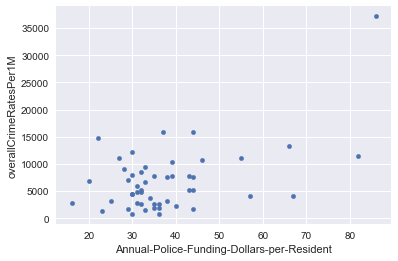

In [203]:
%matplotlib inline
import matplotlib.pyplot as plt
districtCrimeRatesFundingdf.plot.scatter("Annual-Police-Funding-Dollars-per-Resident", "overallCrimeRatesPer1M")

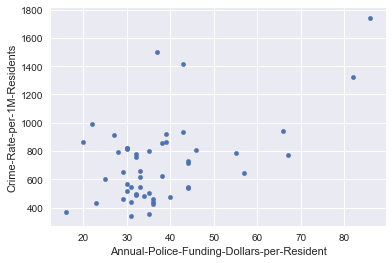

In [175]:
districtCrimeRatesFundingdf.plot.scatter("Annual-Police-Funding-Dollars-per-Resident", "Crime-Rate-per-1M-Residents")

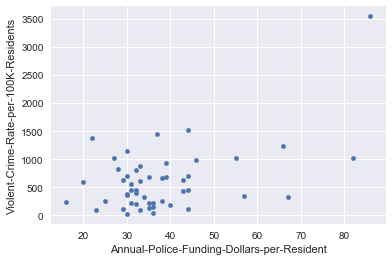

In [176]:
districtCrimeRatesFundingdf.plot.scatter("Annual-Police-Funding-Dollars-per-Resident", "Violent-Crime-Rate-per-100K-Residents")

In [180]:
# <aghatpande> on 12-Jan-2017
# Combine the Crimes Data with the Demographics Data
combineDF = pd.merge(districtCrimeRatesFundingdf, districtDemographicsdf, how="left", on="District-ID")

In [181]:
#combineDF.plot.scatter("% of People 25 Years+ with 4 or more Years of High School", "Crime-Rate-per-1M-Residents")

In [182]:
#combineDF.plot.scatter("% of 16 to 19 year-olds not in highschool and not highschool graduates", "Crime-Rate-per-1M-Residents")

In [183]:
#combineDF.plot.scatter("% of 18 to 24 year-olds in college", "Crime-Rate-per-1M-Residents")

In [184]:
#combineDF.plot.scatter("% of people 25 years+ with at least 4 years of college", "Crime-Rate-per-1M-Residents")

#### Using Decision Tree Feature importances to find the most important factors in determining crime rate

In [185]:
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.tree as tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [186]:
y = combineDF["overallCrimeRatesPer1M"]
X = combineDF.drop(["overallCrimeRatesPer1M", "District-ID", "Crime-Rate-per-1M-Residents", "Violent-Crime-Rate-per-100K-Residents"], axis=1)

In [187]:
tree = DecisionTreeRegressor()
tree.fit(X, y)

importances = tree.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X.shape[1]):
    print("%d. Feature %s (%f)" % (f + 1, X.columns.values[indices[f]], importances[indices[f]]))

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

1. Feature Annual-Police-Funding-Dollars-per-Resident (0.560189)
2. Feature % of People 25 Years+ with 4 or more Years of High School (0.205651)
3. Feature % of 16 to 19 year-olds not in highschool and not highschool graduates (0.155104)
4. Feature % of people 25 years+ with at least 4 years of college (0.040618)
5. Feature % of 18 to 24 year-olds in college (0.038438)


#### Once the important features are identified, lets see its impact (Positive/Negative) on Crime rates

##### Renaming the columns to short names which can be used in Regression model

##### Column [% of People 25 Years+ with 4 or more Years of High School] becomes [A]
##### Column [% of 16 to 19 year-olds not in highschool and not highschool graduates] becomes [B]
##### Column [% of 18 to 24 year-olds in college] becomes [C]
##### Column [% of people 25 years+ with at least 4 years of college] becomes [D]

In [196]:
combineDF.rename(columns = {"% of People 25 Years+ with 4 or more Years of High School":"A", "% of 16 to 19 year-olds not in highschool and not highschool graduates":"B", "% of 18 to 24 year-olds in college":"C", "% of people 25 years+ with at least 4 years of college":"D", "Annual-Police-Funding-Dollars-per-Resident":"AnnualPoliceFundingDollarsPerResident"}, inplace=True)

In [197]:
combineDF.columns

Index([u'District-ID', u'Crime-Rate-per-1M-Residents',
       u'Violent-Crime-Rate-per-100K-Residents',
       u'AnnualPoliceFundingDollarsPerResident', u'overallCrimeRatesPer1M',
       u'A', u'B', u'C', u'D'],
      dtype='object')

In [199]:
import statsmodels.formula.api as smf
formula='overallCrimeRatesPer1M ~ AnnualPoliceFundingDollarsPerResident + A + B + C + D'
lindf = smf.ols(formula, data=combineDF)
result = lindf.fit()
print("\nCoefficients for all android apps with log variables(Download,Raters,Age)\n")
print(result.summary())


Coefficients for all android apps with log variables(Download,Raters,Age)

                              OLS Regression Results                              
Dep. Variable:     overallCrimeRatesPer1M   R-squared:                       0.342
Model:                                OLS   Adj. R-squared:                  0.268
Method:                     Least Squares   F-statistic:                     4.583
Date:                    Sat, 13 Jan 2018   Prob (F-statistic):            0.00189
Time:                            00:51:09   Log-Likelihood:                -494.63
No. Observations:                      50   AIC:                             1001.
Df Residuals:                          44   BIC:                             1013.
Df Model:                               5                                         
Covariance Type:                nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025 

In [160]:
combineDF.corr()

,District-ID,Crime-Rate-per-1M-Residents,Violent-Crime-Rate-per-100K-Residents,AnnualPoliceFundingDollarsPerResident,overallCrimeRatesPer1M,A,B,C,D
District-ID,1.000000,-0.185397,-0.188483,-0.328059,-0.190495,0.141582,-0.657256,0.964544,0.487841
Crime-Rate-per-1M-Residents,-0.185397,1.000000,0.756505,0.533198,0.777195,-0.135459,0.322519,-0.175224,-0.026283
Violent-Crime-Rate-per-100K-Residents,-0.188483,0.756505,1.000000,0.509339,0.999480,-0.184445,0.291031,-0.199070,-0.045570
AnnualPoliceFundingDollarsPerResident,-0.328059,0.533198,0.509339,1.000000,0.516364,0.120265,0.311526,-0.277475,0.124502
overallCrimeRatesPer1M,-0.190495,0.777195,0.999480,0.516364,1.000000,-0.184148,0.295926,-0.200180,-0.045143
A,0.141582,-0.135459,-0.184445,0.120265,-0.184148,1.000000,-0.537162,0.182364,0.681072
B,-0.657256,0.322519,0.291031,0.311526,0.295926,-0.537162,1.000000,-0.626953,-0.513958
C,0.964544,-0.175224,-0.199070,-0.277475,-0.200180,0.182364,-0.626953,1.000000,0.591663
D,0.487841,-0.026283,-0.045570,0.124502,-0.045143,0.681072,-0.513958,0.591663,1.000000
